<center>
    
<h2> PHÂN TÍCH DỮ LIỆU BÁN HÀNG (Project_End_Course)</h2>
<h2 style='color:red'>(Data Analysis Process)</h2>
    
</center>

<img src='Pic/Process.jpg' width='750px'>

## Bước 1: Mô tả bài toán và dữ liệu
---


Một công ty kinh doanh toàn cầu, cung cấp các mặt hàng bao gồm 3 nhóm sản phẩm:
1. Đồ dùng văn phòng (Office Supplies)
2. Sản phẩm công nghệ (Technology)
3. Đồ nội thất (Furniture) 

Công ty bán hàng cho 147 nước, tại 7 thị trường:
1. US: Thị trường Mỹ
2. Canada: Thị trường Canada
3. EU: Các nước liên minh châu Âu
4. Africa: Các nước châu phi
5. LATAM: Các nước khu vực trung và nam mỹ (mỹ la tinh) ('Central', 'South', 'North', 'Caribbean')
6. APAC: Các nước khu vực châu Á thái bình dương ('Oceania', 'Southeast Asia', 'North Asia', 'Central Asia')
7. EMEA: Europe, Middle East, and Africa

Tập dữ liệu Data_sales_2011_2014.xlsx lưu trữ dữ liệu bán hàng trong giai đoạn từ ngày 1/1/2011 đến 31/12/2014, bao gồm 51290 đơn hàng, mỗi đơn hàng bao gồm 21 thuộc tính:

1. order_id: Mã đơn hàng
2. order_date: Ngày đặt hàng
3. ship_date: Ngày ship hàng
4. ship_mode: Chế độ ship hàng (Same Day|First Class|Second Class|Standard Class)
5. customer_name: Tên khách hàng
6. segment: Nhóm khách hàng (Consumer|Corporate|Home Office)
7. state: Bang, khu vực địa chỉ của khách hàng.
8. country: Quốc gia của khách hàng
9. market: Nhóm theo từng khu vực thị trường của khách hàng
10. region: Vùng nào tương ứng với thị trường của khách hàng
11. product_id: Mã sản phẩm
12. category: Danh mục tương ứng của sản phẩm
13. sub_category: Danh mục con trong danh mục chính của sản phẩm
14. product_name: Tên sản phẩm
15. sales: Doanh số bán sản phẩm (USD)
16. quantity: Số lượng sản phẩm đã bán
17. discount: Tỷ lệ % giảm giá cho sản phẩm
18. profit: Lợi nhuận thu được khi bán sản phẩm (USD)
19. shipping_cost: Chi phí ship của đơn hàng
20. orer_priority: Mức độ ưu tiên
21. year: Năm của đơn hàng


<img src='Pic/img1.png' width='750px'>

## Bước 2: Mục tiêu
---



Phân tích tập dữ liệu để trả lời các câu hỏi sau:

Câu hỏi 1: Cho biết doanh số bán hàng và lợi nhuận theo từng năm?

Câu hỏi 2: Thống kê doanh số bán hàng theo tháng?

Câu hỏi 3: Cho biết doanh số bán hàng của công ty tại mỗi thị trường?
 
Câu hỏi 4: Cho biết nhóm khách hàng nào mua hàng chủ yếu và mang lại lợi nhuận như thế nào cho công ty?
  
Câu hỏi 5: Thống kê TOP 10?

1. TOP 10 nước mua hàng nhiều nhất
2. TOP 10 mặt hàng có doanh số bán hàng cao nhất?
4. TOP 10 mặt hàng có số lượng bán hàng nhiều nhất?
5. TOP 10 khách hàng mua hàng nhiều nhất?
  
Câu hỏi 6: Cho biết doanh số bán hàng và lợi nhuận của từng Nhóm sản phẩm?
  
Câu hỏi 7: Một vài thông tin về thị trường VIỆT NAM từ tập dữ liệu?

## Bước 3: Thực hiện

In [2]:
#Khai báo sử dụng các thư viện
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('Data/Data_sales_2011_2014.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
#Hiển thị 5 dòng dữ liệu đầu tiên
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [7]:
#Kiểm tra missing
data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
#Kiểm tra dữ liệu trùng lặp
data.duplicated().sum()

0

In [7]:
#Group theo năm, thực hiện tính doanh số và lợi nhuận bán hàng
profit_year = data[['year','sales','profit']].groupby(['year']).sum()

#Sắp xếp dữ liệu theo lợi nhuận tăng dần
profit_year.sort_values('profit',inplace=True)
profit_year

,sales,profit
year,,
2011,2.259451e+06,248940.81154
2012,2.677439e+06,307415.27910
2013,3.405746e+06,408512.76018
2014,4.299866e+06,504165.97046


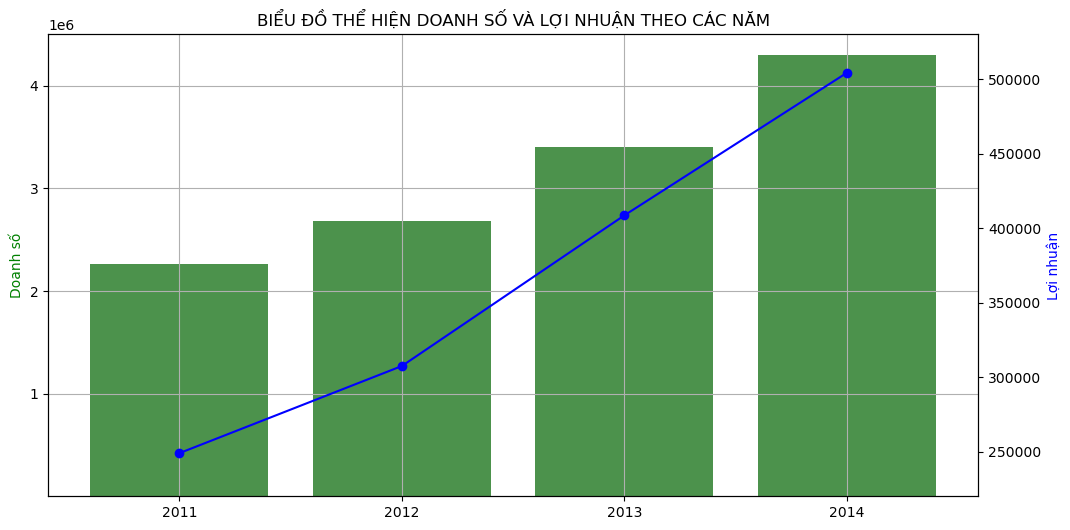

In [175]:


# Tính tổng lợi nhuận và doanh số theo năm
profit_by_year = data.groupby('year')['profit'].sum()
sales_by_year = data.groupby('year')['sales'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu đồ doanh số theo cột
ax1.bar(sales_by_year.index, sales_by_year.values, alpha=0.7, label='Doanh số', color='#006400')
ax1.set_ylabel('Doanh số', color='green')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 4.5*1e6)
plt.yticks([1e6,2e6,3e6,4e6])


# Biểu đồ lợi nhuận theo đường (trục phụ bên phải)
ax2 = ax1.twinx()
ax2.plot(profit_by_year.index, profit_by_year.values, marker='o', label='Lợi nhuận', color='blue')
ax2.set_ylabel('Lợi nhuận', color='blue')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(220000, 530000)
plt.yticks([250000,300000,350000,400000,450000,500000])

# Đặt tên trục x và tiêu đề biểu đồ
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHUẬN THEO CÁC NĂM')
plt.xticks([2011,2012,2013,2014])

# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


# Hiển thị lưới cho biểu đồ
ax1.grid(True)

# Hiển thị biểu đồ
plt.show()


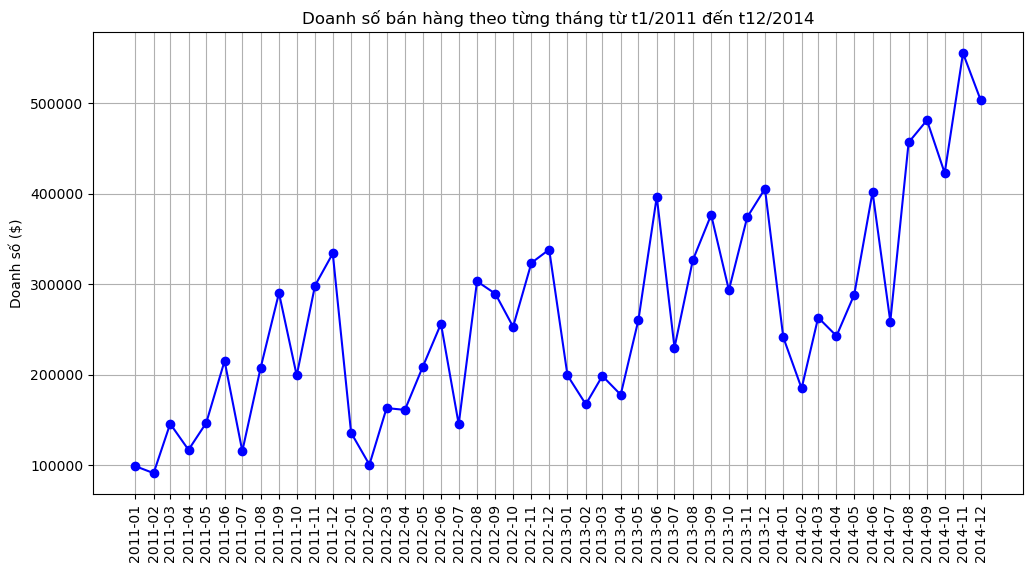

In [44]:

data['order_date'] = pd.to_datetime(data['order_date'])

# Trích xuất thông tin tháng và năm từ cột "order_date"
data['month'] = data['order_date'].dt.month
data['year'] = data['order_date'].dt.year

# Tạo một Series để lưu trữ tổng doanh số cho mỗi tháng từ t1/2011 đến t12/2014
monthly_sales = pd.Series(index=pd.date_range(start='2011-01-01', end='2014-12-31', freq='MS'), dtype=float)

# Tính tổng doanh số cho từng tháng
for year in range(2011, 2015):
    for month in range(1, 13):
        total_sales = data[(data['year'] == year) & (data['month'] == month)]['sales'].sum()
        monthly_sales[f'{year}-{month:02d}-01'] = total_sales

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.ylabel('Doanh số ($)')
plt.title('Doanh số bán hàng theo từng tháng từ t1/2011 đến t12/2014')
plt.grid(True)

# Cấu hình trục x để hiển thị tất cả các tháng
plt.xticks(pd.date_range(start='2011-01-01', end='2014-12-31', freq='MS'), [f'{year}-{month:02d}' for year in range(2011, 2015) for month in range(1, 13)], rotation=90)

plt.show()


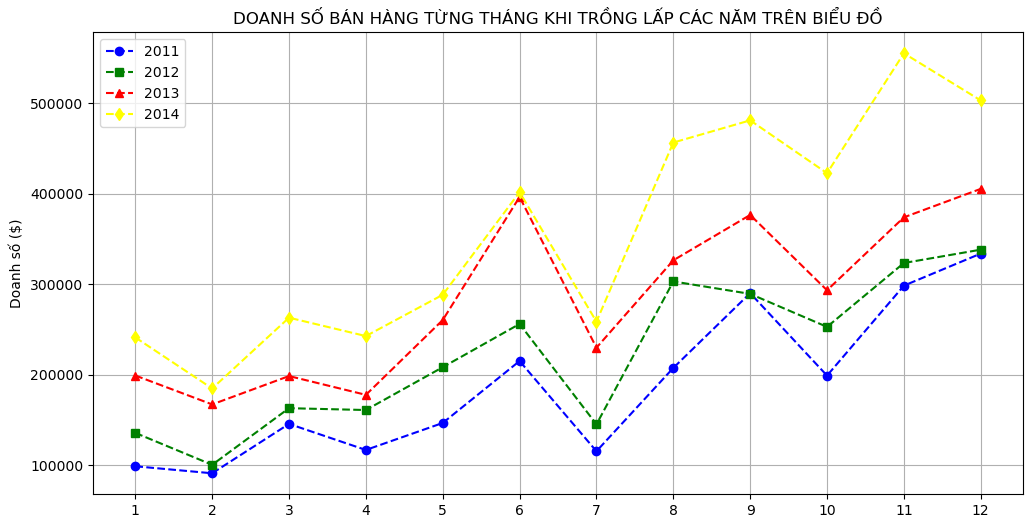

In [56]:

# Tính tổng doanh số cho từng tháng của từng năm
monthly_sales = data.groupby(['year', 'month'])['sales'].sum()

# Chuyển đổi dữ liệu thành một dataframe mới để dễ dàng vẽ biểu đồ
monthly_sales_df = monthly_sales.unstack(level='year')

# Vẽ biểu đồ đường cho từng năm
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df.index, monthly_sales_df[2011], marker='o', linestyle='--',color = 'blue', label='2011')
plt.plot(monthly_sales_df.index, monthly_sales_df[2012], marker='s', linestyle='--',color = 'green', label='2012')
plt.plot(monthly_sales_df.index, monthly_sales_df[2013], marker='^', linestyle='--',color = 'red', label='2013')
plt.plot(monthly_sales_df.index, monthly_sales_df[2014], marker='d', linestyle='--',color = 'yellow', label='2014')
plt.ylabel('Doanh số ($)')
plt.title('DOANH SỐ BÁN HÀNG TỪNG THÁNG KHI TRỒNG LẤP CÁC NĂM TRÊN BIỂU ĐỒ')
plt.xticks(range(1, 13), [str(i) for i in range(1, 13)])
plt.grid(True)
plt.legend()
plt.show()


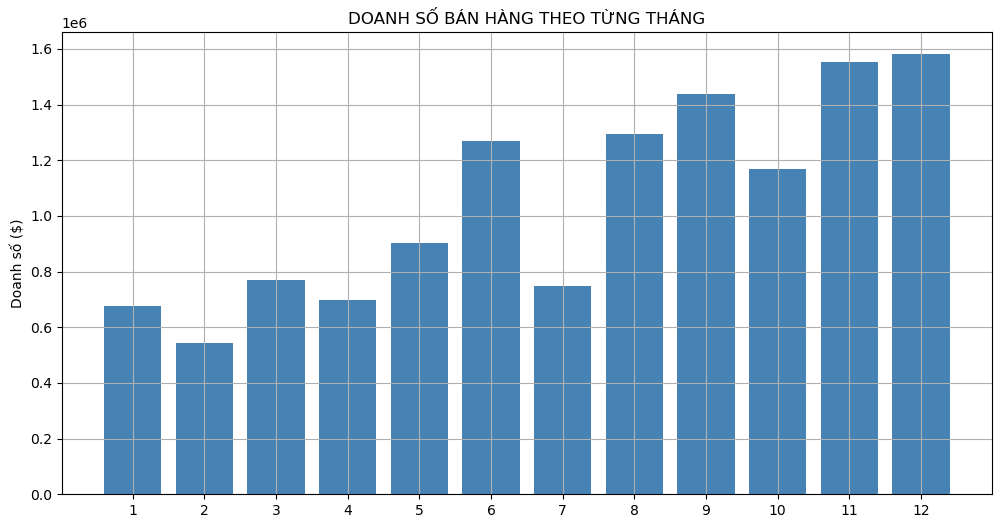

In [60]:

# Vẽ biểu đồ cột cho tổng doanh số của từng tháng
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index, monthly_sales.values, width=0.8, align='center', color='#4682B4')

plt.ylabel('Doanh số ($)')
plt.title('DOANH SỐ BÁN HÀNG THEO TỪNG THÁNG')
plt.xticks(range(1, 13), [str(i) for i in range(1, 13)])
plt.grid(True)
plt.show()


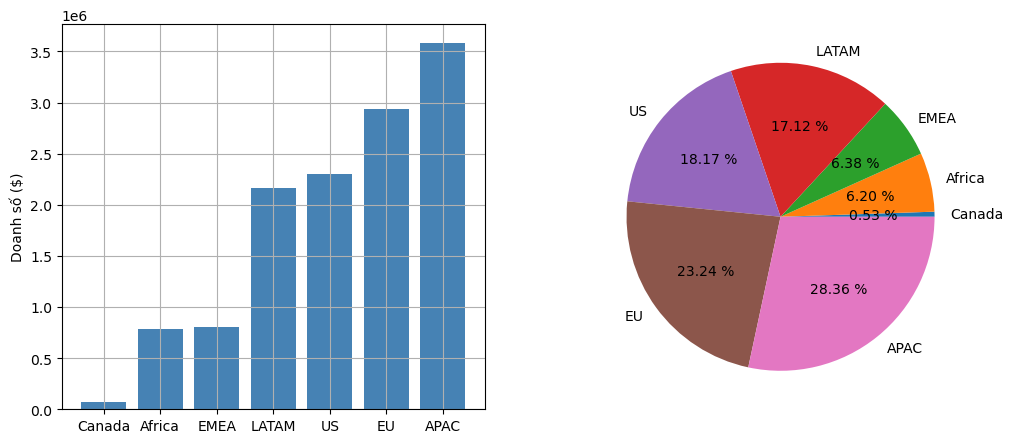

In [86]:
market_sales = data.groupby(['market'])['sales'].sum()
market_sales = market_sales.sort_values()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
labels = ['Canada','Africa','EMEA','LATAM','US','EU','APAC']
plt.bar(labels, market_sales.values, width=0.8, align='center', color='#4682B4')

plt.ylabel('Doanh số ($)')
plt.grid(True)

plt.subplot(1,2,2)
plt.pie(market_sales.values,labels=labels,autopct='%.2f %%')
plt.show()

In [95]:
segment = data[['segment','sales','profit']].groupby('segment').sum()
segment = segment.sort_values('profit')


                    sales        profit
segment                                
Home Office  2.309855e+06  277009.18056
Corporate    3.824698e+06  442785.85866
Consumer     6.507949e+06  749239.78206


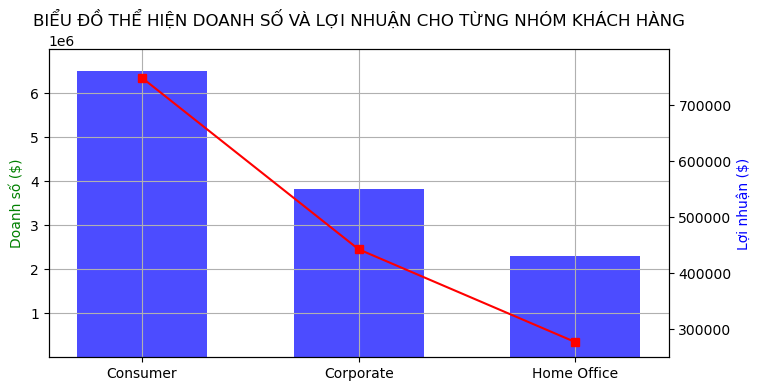

In [36]:

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(8, 4))

# Biểu đồ doanh số theo cột
ax1.bar(sales_by_segment.index, sales_by_segment.values, alpha=0.7,width=0.6, label='Doanh số', color='blue')
ax1.set_ylabel('Doanh số ($)', color='green')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 7e6)
plt.yticks([1e6,2e6,3e6,4e6,5e6,6e6])


# Biểu đồ lợi nhuận theo đường (trục phụ bên phải)
ax2 = ax1.twinx()
ax2.plot(profit_by_segment.index, profit_by_segment.values, marker='s', label='Lợi nhuận', color='red')
ax2.set_ylabel('Lợi nhuận ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(250000, 800000)
plt.yticks([300000,400000,500000,600000,700000])

# Đặt tên trục x và tiêu đề biểu đồ
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHUẬN CHO TỪNG NHÓM KHÁCH HÀNG')


# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


# Hiển thị lưới cho biểu đồ
ax1.grid(True)

# Hiển thị biểu đồ
plt.show()


In [61]:
sales_country = data[['sales','country']].groupby('country').sum()
sales_country.sort_values(by='sales',inplace=True)
sales_country = sales_country.tail(10)
sales_country = sales_country.groupby(['country'])['sales'].sum()
sales_country.sort_values(ascending=False,inplace=True)

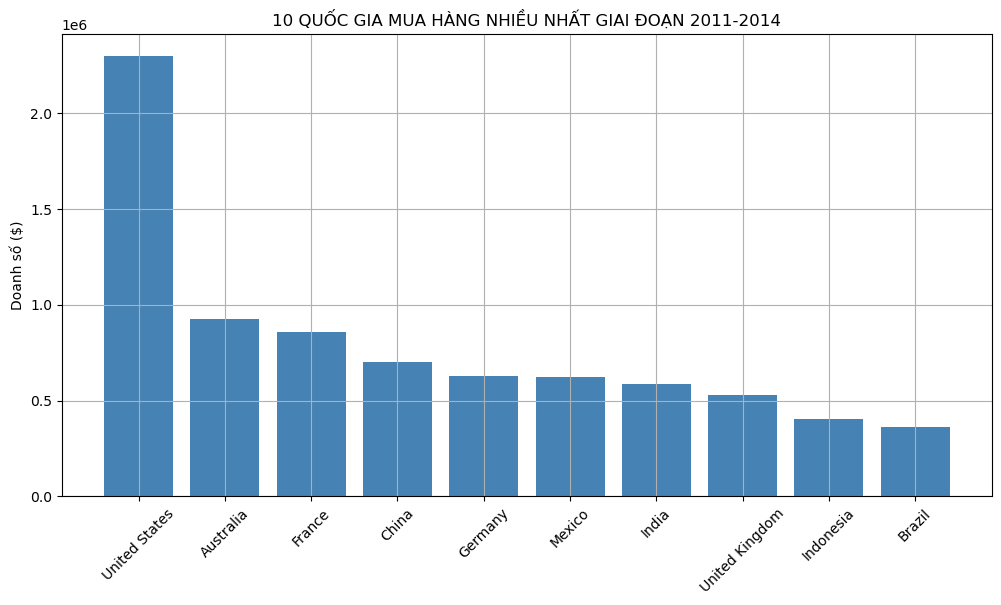

In [62]:

plt.figure(figsize=(12,6))
plt.bar(sales_country.index,sales_country.values,color='#4682B4')
plt.xticks(rotation=45)
plt.ylabel('Doanh số ($)')
plt.title('10 QUỐC GIA MUA HÀNG NHIỀU NHẤT GIAI ĐOẠN 2011-2014')
plt.grid()
plt.show()

In [73]:
sale_pro = data[['product_name','sales']].groupby('product_name').sum()
sale_pro.sort_values(by='sales',inplace=True)
sale_pro = sale_pro.tail(10)
sale_pro = sale_pro.groupby(['product_name'])['sales'].sum()
sale_pro.sort_values(ascending=False,inplace=True)
sale_pro

product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64

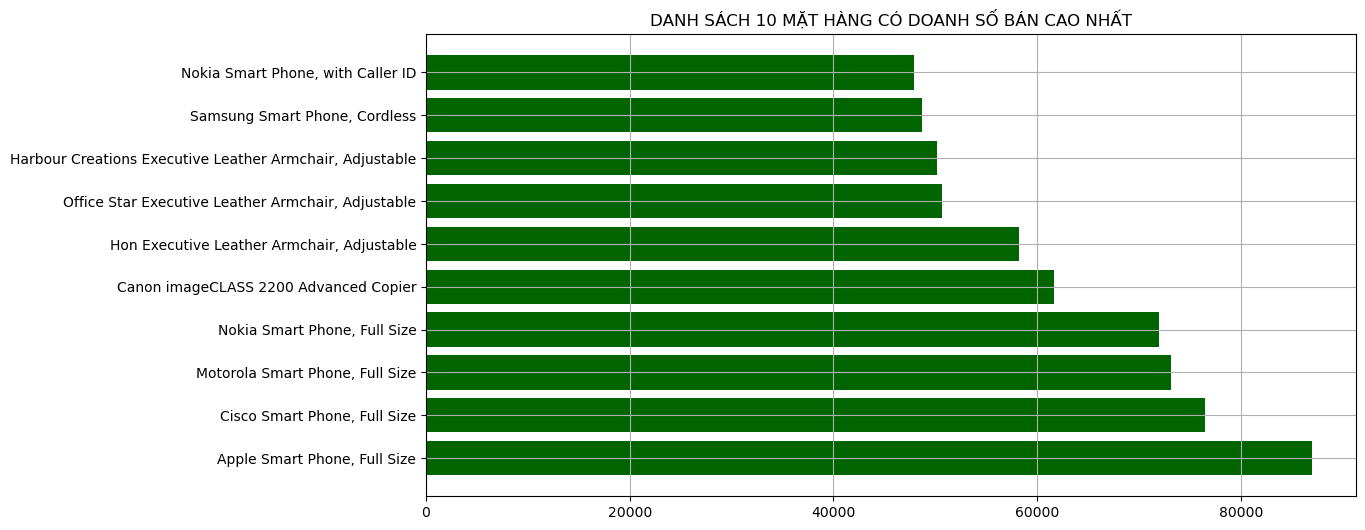

In [80]:
plt.figure(figsize=(12,6))
plt.barh(sale_pro.index,sale_pro.values,color='#006400')
plt.grid()
plt.title('DANH SÁCH 10 MẶT HÀNG CÓ DOANH SỐ BÁN CAO NHẤT')
plt.show()

In [77]:
sale_pro1 = data[['product_name','quantity']].groupby('product_name').sum()
sale_pro1.sort_values(by='quantity',inplace=True)
sale_pro1 = sale_pro1.tail(10)
sale_pro1 = sale_pro1.groupby(['product_name'])['quantity'].sum()
sale_pro1.sort_values(ascending=False,inplace=True)
sale_pro1

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

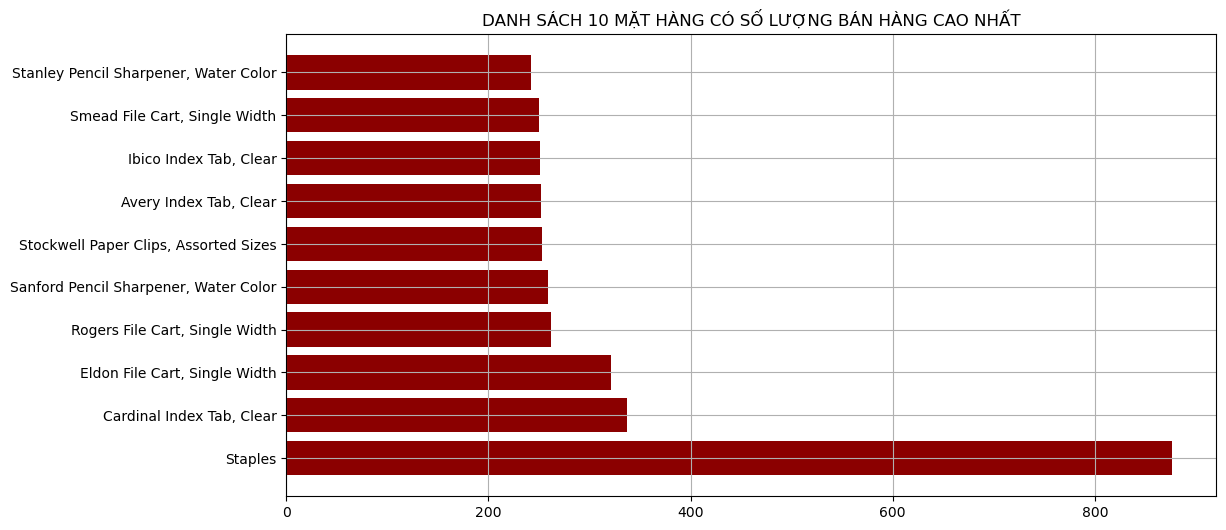

In [79]:
plt.figure(figsize=(12,6))
plt.barh(sale_pro1.index,sale_pro1.values,color='#8B0000')
plt.grid()
plt.title('DANH SÁCH 10 MẶT HÀNG CÓ SỐ LƯỢNG BÁN HÀNG CAO NHẤT')
plt.show()

In [107]:
cus_data = data[['customer_name','segment','state','country','sales']].groupby('sales').sum()
cus_data.sort_values(by='sales',ascending=False,inplace=True)
cus_data.head(10)


,customer_name,segment,state,country
sales,,,,
22638.480,Sean Miller,Home Office,Florida,United States
17499.950,Tamara Chand,Corporate,Indiana,United States
13999.960,Raymond Buch,Consumer,Washington,United States
11199.968,Tom Ashbrook,Home Office,New York,United States
10499.970,Hunter Lopez,Consumer,Delaware,United States
9892.740,Adrian Barton,Consumer,Michigan,United States
9449.950,Sanjit Chand,Consumer,Minnesota,United States
9099.930,Bill Shonely,Corporate,New Jersey,United States
8749.950,Sanjit Engle,Consumer,Virginia,United States


In [108]:

profit_year = data[['category','sales','profit']].groupby(['category']).sum()


profit_year.sort_values('profit',inplace=True)
profit_year

,sales,profit
category,,
Furniture,4.110874e+06,286782.25380
Office Supplies,3.787070e+06,518473.83430
Technology,4.744557e+06,663778.73318


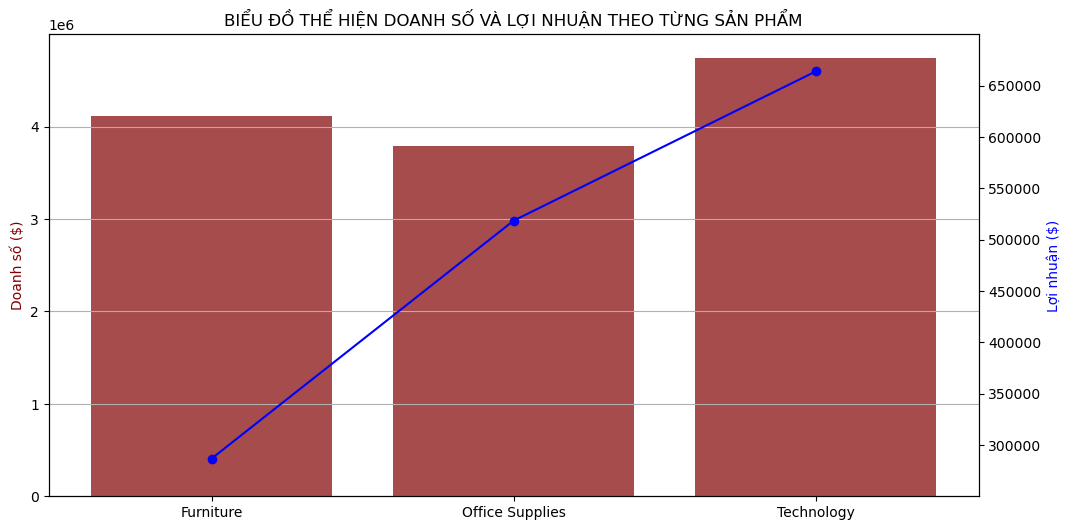

In [111]:


# Tính tổng lợi nhuận và doanh số theo năm
profit_by_year = data.groupby('category')['profit'].sum()
sales_by_year = data.groupby('category')['sales'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu đồ doanh số theo cột
ax1.bar(sales_by_year.index, sales_by_year.values, alpha=0.7, label='Doanh số', color='#800000')
ax1.set_ylabel('Doanh số ($)', color='#800000')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 5e6)
plt.yticks([0,1e6,2e6,3e6,4e6])


# Biểu đồ lợi nhuận theo đường (trục phụ bên phải)
ax2 = ax1.twinx()
ax2.plot(profit_by_year.index, profit_by_year.values, marker='o', label='Lợi nhuận', color='blue')
ax2.set_ylabel('Lợi nhuận ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(250000, 700000)
plt.yticks([300000,350000,400000,450000,500000,550000,600000,650000])

# Đặt tên trục x và tiêu đề biểu đồ
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHUẬN THEO TỪNG SẢN PHẨM')


# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


# Hiển thị lưới cho biểu đồ
ax1.grid(axis='y')

# Hiển thị biểu đồ
plt.show()


In [116]:
profit_year = data[['sub_category','sales','profit']].groupby(['sub_category']).sum()


profit_year.sort_values('profit',inplace=True)
profit_year = profit_year.loc[['Bookcases','Chairs','Furnishings','Tables']]


,sales,profit
sub_category,,
Bookcases,1.466572e+06,161924.4195
Chairs,1.501682e+06,141973.7975
Furnishings,3.855783e+05,46967.4255
Tables,7.570419e+05,-64083.3887


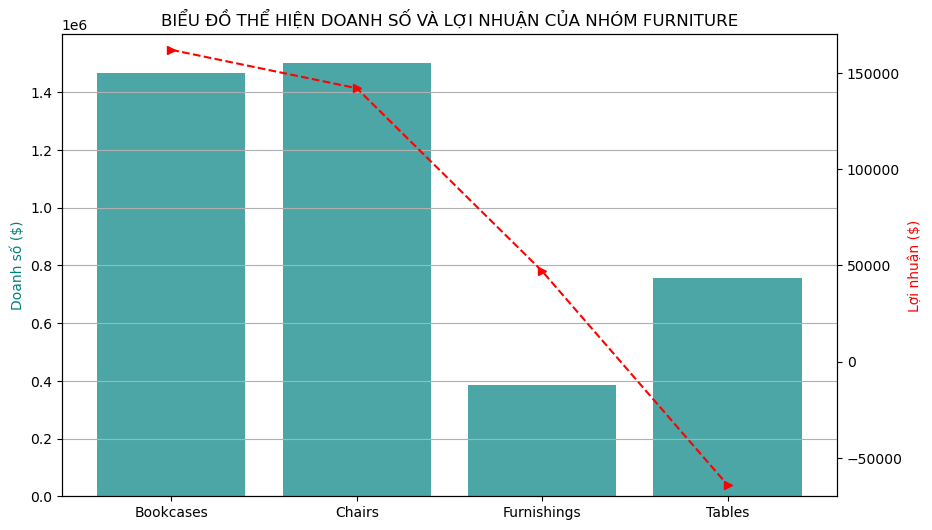

In [124]:


# Tính tổng lợi nhuận và doanh số theo năm
profit_by_year = profit_year.groupby('sub_category')['profit'].sum()
sales_by_year = profit_year.groupby('sub_category')['sales'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ doanh số theo cột
ax1.bar(sales_by_year.index, sales_by_year.values, alpha=0.7, label='Doanh số', color='#008080')
ax1.set_ylabel('Doanh số ($)', color='#008080')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 1.6e6)
plt.yticks([0,0.2e6,0.4e6,0.6e6,0.8e6,1e6,1.2e6,1.4e6])


# Biểu đồ lợi nhuận theo đường (trục phụ bên phải)
ax2 = ax1.twinx()
ax2.plot(profit_by_year.index, profit_by_year.values, marker='>',ls='--', label='Lợi nhuận', color='red')
ax2.set_ylabel('Lợi nhuận ($)', color='red')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(-70000, 170000)
plt.yticks([-50000,0,50000,100000,150000])

# Đặt tên trục x và tiêu đề biểu đồ
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHUẬN CỦA NHÓM FURNITURE')


# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


# Hiển thị lưới cho biểu đồ
ax1.grid(axis='y')

# Hiển thị biểu đồ
plt.show()


In [125]:
profit_year = data[['sub_category','sales','profit']].groupby(['sub_category']).sum()


profit_year.sort_values('profit',inplace=True)
profit_year = profit_year.loc[['Appliances','Art','Binders','Envelopes','Fasteners','Labels','Paper','Storage','Supplies']]
profit_year

,sales,profit
sub_category,,
Appliances,1.011064e+06,141680.5894
Art,3.720920e+05,57953.9109
Binders,4.619115e+05,72449.8460
Envelopes,1.709043e+05,29601.1163
Fasteners,8.324232e+04,11525.4241
Labels,7.340403e+04,15010.5120
Paper,2.442917e+05,59207.6827
Storage,1.127086e+06,108461.4898
Supplies,2.430742e+05,22583.2631


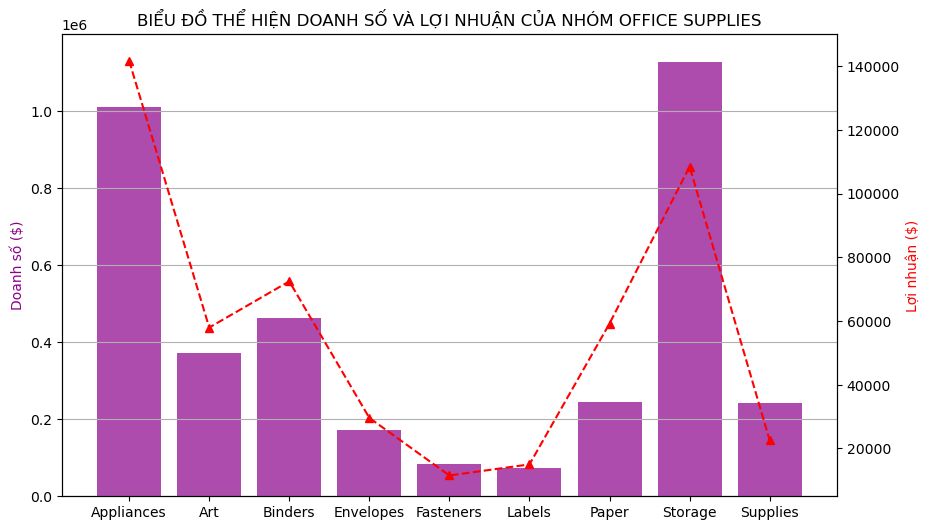

In [139]:


# Tính tổng lợi nhuận và doanh số theo năm
profit_by_year = profit_year.groupby('sub_category')['profit'].sum()
sales_by_year = profit_year.groupby('sub_category')['sales'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ doanh số theo cột
ax1.bar(sales_by_year.index, sales_by_year.values, alpha=0.7, label='Doanh số', color='#8B008B')
ax1.set_ylabel('Doanh số ($)', color='#8B008B')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 1.2e6)
plt.yticks([0,0.2e6,0.4e6,0.6e6,0.8e6,1e6])


# Biểu đồ lợi nhuận theo đường (trục phụ bên phải)
ax2 = ax1.twinx()
ax2.plot(profit_by_year.index, profit_by_year.values, marker='^',ls='--', label='Lợi nhuận', color='red')
ax2.set_ylabel('Lợi nhuận ($)', color='red')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(5000,150000)
plt.yticks([20000,40000,60000,80000,100000,120000,140000])

# Đặt tên trục x và tiêu đề biểu đồ
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHUẬN CỦA NHÓM OFFICE SUPPLIES')


# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


# Hiển thị lưới cho biểu đồ
ax1.grid(axis='y')


# Hiển thị biểu đồ
plt.show()


In [142]:
profit_year = data[['sub_category','sales','profit']].groupby(['sub_category']).sum()


profit_year.sort_values('profit',inplace=True)
profit_year = profit_year.loc[['Accessories','Copiers','Machines','Phones']]
profit_year

,sales,profit
sub_category,,
Accessories,7.492370e+05,129626.30620
Copiers,1.509436e+06,258567.54818
Machines,7.790601e+05,58867.87300
Phones,1.706824e+06,216717.00580


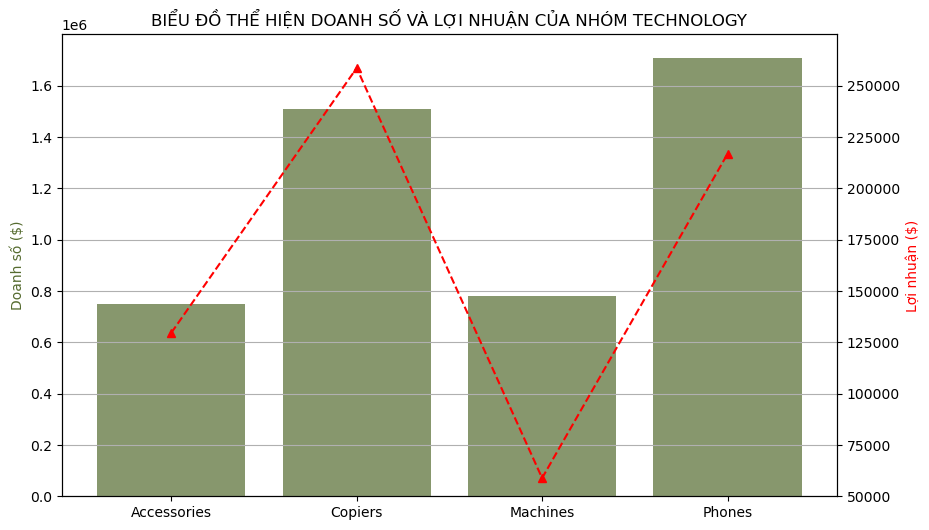

In [145]:


# Tính tổng lợi nhuận và doanh số theo năm
profit_by_year = profit_year.groupby('sub_category')['profit'].sum()
sales_by_year = profit_year.groupby('sub_category')['sales'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ doanh số theo cột
ax1.bar(sales_by_year.index, sales_by_year.values, alpha=0.7, label='Doanh số', color='#556B2F')
ax1.set_ylabel('Doanh số ($)', color='#556B2F')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 1.8e6)
plt.yticks([0,0.2e6,0.4e6,0.6e6,0.8e6,1e6,1.2e6,1.4e6,1.6e6])


# Biểu đồ lợi nhuận theo đường (trục phụ bên phải)
ax2 = ax1.twinx()
ax2.plot(profit_by_year.index, profit_by_year.values, marker='^',ls='--', label='Lợi nhuận', color='red')
ax2.set_ylabel('Lợi nhuận ($)', color='red')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(50000,275000)
plt.yticks([50000,75000,100000,125000,150000,175000,200000,225000,250000])

# Đặt tên trục x và tiêu đề biểu đồ
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH SỐ VÀ LỢI NHUẬN CỦA NHÓM TECHNOLOGY')


# Hiển thị chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


# Hiển thị lưới cho biểu đồ
ax1.grid(axis='y')


# Hiển thị biểu đồ
plt.show()


In [160]:
vietnam_data = data[data['country'] == 'Vietnam'][['country', 'sales', 'profit']]
import pandas as pd
total_sales_vietnam = vietnam_data['sales'].sum()
total_profit_vietnam = vietnam_data['profit'].sum()
vietnam_summary = pd.DataFrame({'Total Sales': [total_sales_vietnam], 'Total Profit': [total_profit_vietnam]})

vietnam_summary

,Total Sales,Total Profit
0,65800.1994,-1870.2306


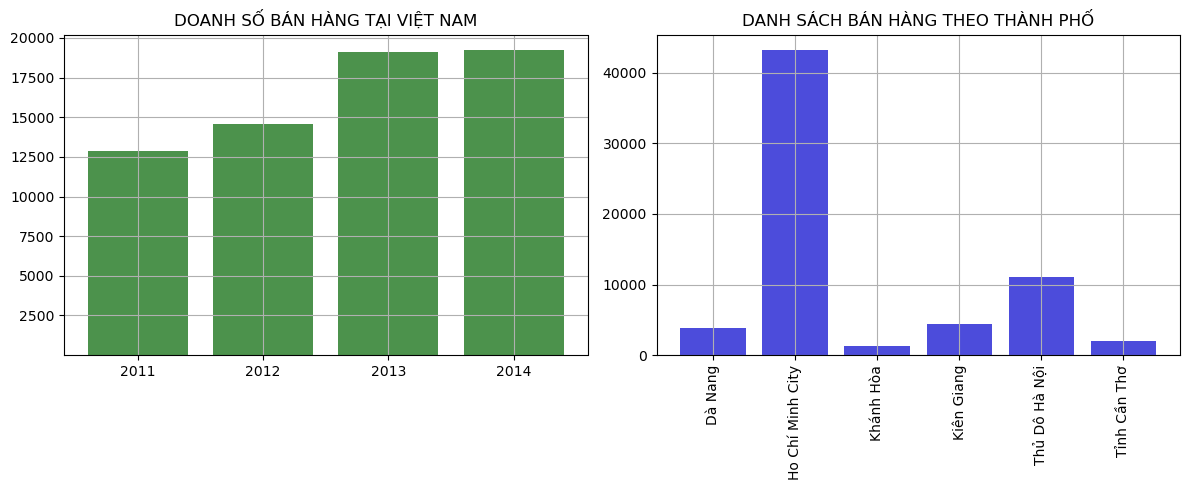

In [174]:
# Lọc dữ liệu của Việt Nam
vietnam_data = data[data['country'] == 'Vietnam']

# Tính tổng doanh số của từng năm (2011, 2012, 2013, 2014)
sales_by_year = vietnam_data.groupby('year')['sales'].sum()

# Tính tổng doanh số của từng thành phố trong 4 năm
sales_by_city = vietnam_data.groupby('state')['sales'].sum()

# Vẽ biểu đồ cột cho doanh số theo từng năm
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(sales_by_year.index, sales_by_year.values, alpha=0.7, color='#006400')
plt.xticks([2011,2012,2013,2014])
plt.yticks([2500,5000,7500,10000,12500,15000,17500,20000])
plt.title('DOANH SỐ BÁN HÀNG TẠI VIỆT NAM')
plt.grid()
# Vẽ biểu đồ cột cho tổng doanh số theo từng thành phố trong 4 năm
plt.subplot(1, 2, 2)
plt.bar(sales_by_city.index, sales_by_city.values, alpha=0.7, color='#0000CD')
plt.title('DANH SÁCH BÁN HÀNG THEO THÀNH PHỐ')
plt.xticks(rotation=90)
# Hiển thị biểu đồ
plt.grid()
plt.tight_layout()
plt.show()


# Thank you for reading!